In [4]:
using Pkg

Pkg.activate("/home/rs/.julia/environments/triangulations/")

"/home/rs/.julia/environments/triangulations/Project.toml"

# CairoMakie plotting basics

In [37]:
using AbstractPlotting
using CairoMakie

In [130]:
n = 7
x = 300 * rand(n)
y = 200 * rand(n)
[x y]'

2×7 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 191.665  120.53    85.1747  298.9    229.5    133.18    85.0785
 198.238  152.319  181.068   120.219  165.621  199.289  109.279 

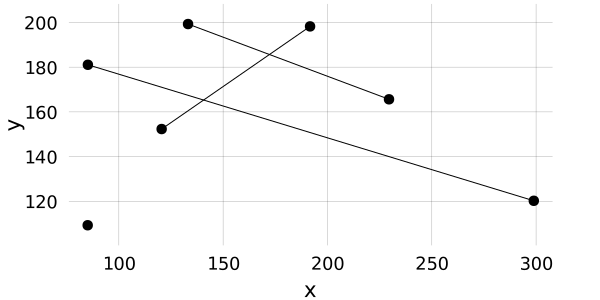

In [131]:
scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=5)
linesegments!(x, y)

# TriangleMesh.jl

In [132]:
using TriangleMesh

In [133]:
# simple point cloud meshing
p = [x y]
mesh = create_mesh(p)

┌ Info: Number of point markers > 1. Only 0 or 1 admissible. Set to 1.
└ @ TriangleMesh /home/rs/.julia/packages/TriangleMesh/1MqBd/src/TriangleMesh_Polygon.jl:43


TriMesh("Triangular mesh of convex hull of point cloud.", 17, [191.665 120.53 … 230.997 128.073; 198.238 152.319 … 146.637 111.478], 1, [16777217 65536 … 0 1], 7, [6.92175e-310 6.92175e-310 … 6.9216e-310 6.92173e-310; 6.92175e-310 6.92175e-310 … 6.9216e-310 6.92173e-310; … ; 6.92175e-310 6.92175e-310 … 6.92164e-310 6.92172e-310; 6.92175e-310 6.92175e-310 … 6.92164e-310 6.92172e-310], 19, [7 17 … 2 13; 2 13 … 7 16; 3 2 … 17 14], [4 6 … 0 16; 0 19 … 3 6; 19 0 … 2 15], 35, [7 2 … 8 7; 2 3 … 11 17], 1, [0, 0, 1, 1, 0, 0, 0, 1, 0, 0  …  0, 1, 1, 0, 1, 0, 1, 1, 1, 1], 13, [4 1 … 15 17; 15 9 … 13 7], 1, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0, Array{Float64}(2,0), TriangleMesh.VoronoiDiagram("Triangular mesh of convex hull of point cloud. - Voronoi diagram", 0, Array{Float64}(2,0), 0, Array{Float64}(1,0), 0, Array{Int64}(2,0), Array{Float64}(2,0)))

In [134]:
mesh.edge

2×35 Array{Int64,2}:
 7  2  3  17  13   2  2  6  14   5  12  …  12  10  16  13  14  15  4   8   7
 2  3  7  13   2  17  6  3   5  12  14      9  12  13  15  16   4  8  11  17

In [135]:
mesh.point

2×17 Array{Float64,2}:
 191.665  120.53    85.1747  298.9    …  210.698  234.984  230.997  128.073
 198.238  152.319  181.068   120.219     161.002  116.949  146.637  111.478

In [136]:
mesh.point[:, vec(mesh.edge)]

2×70 Array{Float64,2}:
  85.0785  120.53   120.53    85.1747  …  245.282  238.58    85.0785  128.073
 109.279   152.319  152.319  181.068      159.228  164.104  109.279   111.478

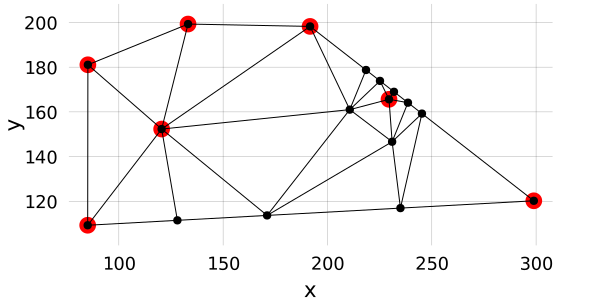

In [137]:
scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

┌ Info: Number of point markers > 1. Only 0 or 1 admissible. Set to 1.
└ @ TriangleMesh /home/rs/.julia/packages/TriangleMesh/1MqBd/src/TriangleMesh_Polygon.jl:43


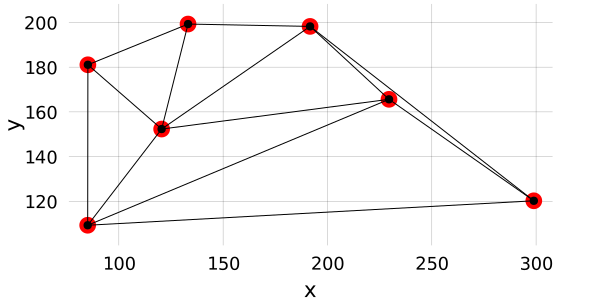

In [143]:
# again, but no Steiner points
mesh = create_mesh(p, prevent_steiner_points=true, delaunay=true)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [144]:
mesh1 = mesh;

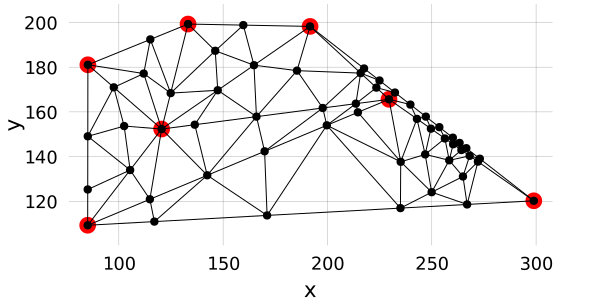

In [145]:
# refine this mesh
mesh = refine(mesh1, keep_edges=true)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

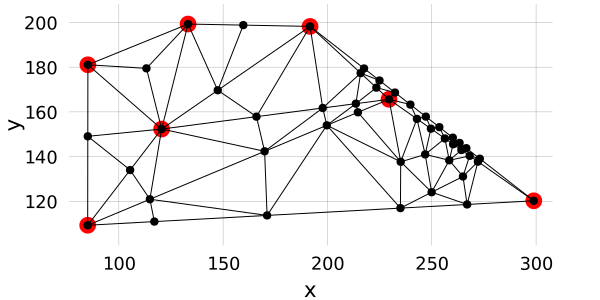

In [146]:
# refine this mesh
mesh = refine(mesh1, divide_cell_into=2, keep_edges=true)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [96]:
# better, but few Steiner points in the interior?

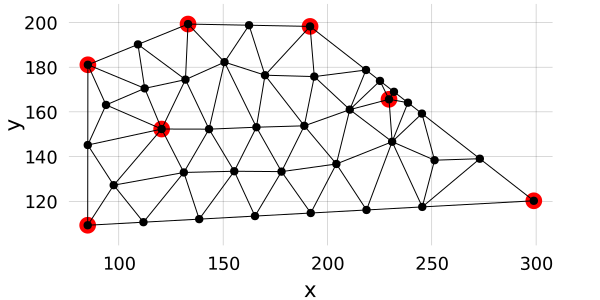

In [147]:
# refine this mesh
mesh = refine(mesh1, keep_segments=true)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [ ]:
# not keeping enough of the original edges, but homogeneously looking

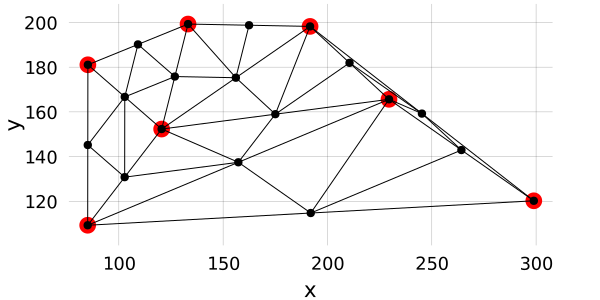

In [148]:
# refine this mesh
mesh = refine_rg(mesh1)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [149]:
# easy to understand and repeatable, but still awkward Steiner points?
mesh2 = mesh;

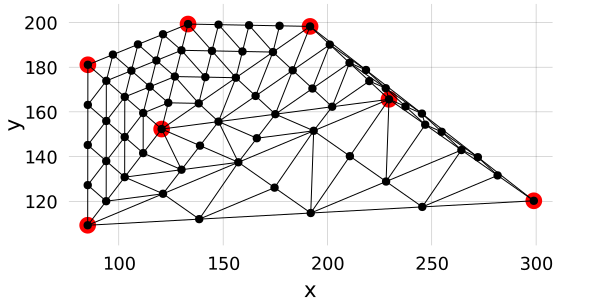

In [150]:
# refine this mesh, again
mesh = refine_rg(mesh2)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [153]:
# looks too regular :-\ try again

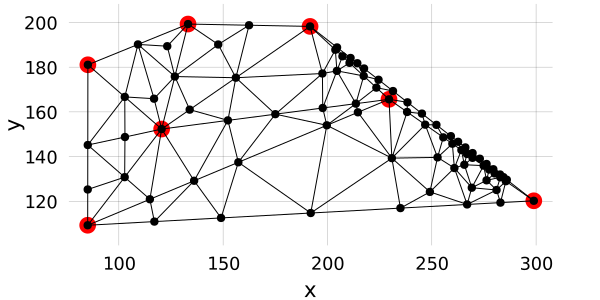

In [156]:
# refine this mesh, again
mesh = refine(mesh2, divide_cell_into=1, keep_segments=true)

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
scatter!(mesh.point', markersize=4)
linesegments!(mesh.point[:, vec(mesh.edge)]')

In [157]:
# just using pre-existing meshing methods and refinements is not good enough :-(

# Triangle.jl

In [158]:
using Triangle

triangles = Array{Int64,1}[[7, 2, 3], [2, 7, 5], [3, 2, 6], [5, 4, 1], [1, 2, 5], [6, 2, 1], [5, 7, 4]]
edges = [7 2 3 2 7 5 3 2 6 5 4 1 1 2 5 6 2 1 5 7 4; 2 3 7 7 5 2 2 6 3 4 1 5 2 5 1 2 1 6 7 4 5]


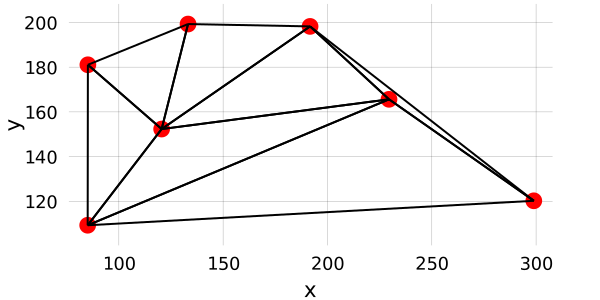

In [237]:
# Start with straight-forward Delaunay triangulation, again.
points = [x y]
points_map = collect(1:n)

triangles = basic_triangulation(points, points_map)
@show triangles

edges = reshape(vcat([t[[1, 2, 2, 3, 3, 1]] for t in triangles]...), 2, :)
@show edges

scene = Scene(resolution=(600,300))
scatter!(x, y, markersize=8, color=:red)
linesegments!(points[vec(edges), :], linewidth=2)

In [238]:
using Statistics

In [239]:
mean([1 2; 3 4], dims=1)

1×2 Array{Float64,2}:
 2.0  3.0

In [240]:
# for each triangle, add a point in the center (mean)
centers = [mean(points[t, :], dims=1) for t in triangles]

7-element Array{Array{Float64,2},1}:
 [96.9276 147.555]
 [145.036 142.406]
 [112.962 177.559]
 [240.022 161.359]
 [180.565 172.059]
 [148.458 183.282]
 [204.493 131.706]

centers_array = [96.9276 147.555; 145.036 142.406; 112.962 177.559; 240.022 161.359; 180.565 172.059; 148.458 183.282; 204.493 131.706]


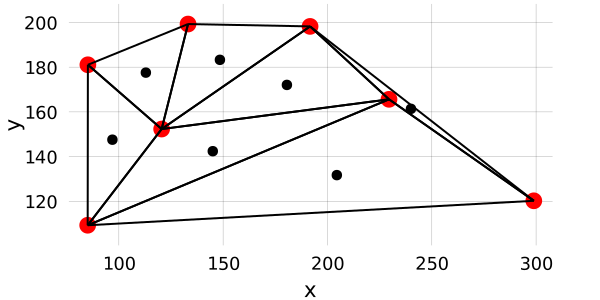

In [241]:
centers_array = reshape(hcat(centers...), 2, :)'
@show centers_array
scatter!(centers_array, markersize=5)

In [242]:
edges'[:,:]

21×2 Array{Int64,2}:
 7  2
 2  3
 3  7
 2  7
 7  5
 5  2
 3  2
 2  6
 6  3
 5  4
 4  1
 1  5
 1  2
 2  5
 5  1
 6  2
 2  1
 1  6
 5  7
 7  4
 4  5

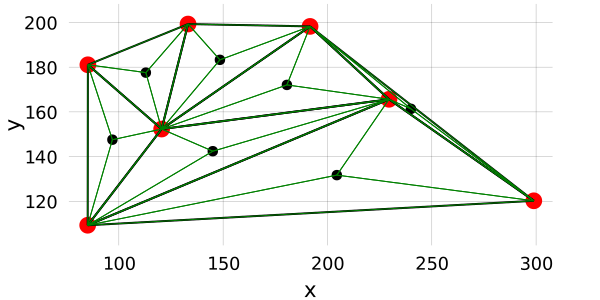

In [243]:
points2 = vcat(points, centers_array)
points_map2 = collect(1:size(points2, 1))
triangles2 = constrained_triangulation(points2, points_map2, edges'[:,:])

edges2 = reshape(vcat([t[[1, 2, 2, 3, 3, 1]] for t in triangles2]...), 2, :)
linesegments!(points2[vec(edges2), :], color=:green)

In [ ]:
# need also subdivide the edges that we want to keep?
# TODO...